In [6]:
# fore data manipulation
import numpy as np
import pandas as pd

import sys

# for visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize

# to display plot in the notebook
%matplotlib inline

# for splitting data
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
# checking the versions of the libraries
libraries = [['Numpy', np],['Pandas', pd],['Matplotlib', matplotlib],['seaborn', sns],['sklearn', sklearn]]
for i in libraries:
    print('{0} Version: {1}'.format(i[0], i[1].__version__))
print("Python:", sys.version)

Numpy Version: 1.16.2
Pandas Version: 0.24.2
Matplotlib Version: 3.0.3
seaborn Version: 0.9.0
sklearn Version: 0.20.3
Python: 3.6.8 |Anaconda custom (64-bit)| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]


In [7]:
# reading the test and train data

X_train = pd.read_csv('X_train.csv' , encoding='ISO-8859-1')
y_train = pd.read_csv('y_train.csv', encoding='ISO-8859-1', header=None)
X_test = pd.read_csv('X_test.csv', encoding='ISO-8859-1')
y_test = pd.read_csv('y_test.csv', encoding='ISO-8859-1', header=None)

In [4]:
print(X_train.shape)
print(y_train.shape)

X_train.head()

(7568, 143)
(7568, 1)


,Order,Property Id,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Natural Gas Use (kBtu),...,Category__Office.2,Category__Other.1,Category__Others.2,Category__Residence Hall/Dormitory.1,Category__3,Category__4,Category__5,Category__6,Category__7,Category__Others.3
0,4334,2669751,104000.0,1960,1,100,85.6,6.9,0.0,227600.0,...,0,0,0,0,0,0,1,0,0,0
1,870,2679476,136070.0,1963,1,100,91.1,5.4,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
2,6345,2787415,107106.0,1924,2,100,56.9,3.3,0.1,665384.9,...,0,0,0,0,0,1,0,0,0,0
3,9280,2658110,57786.0,1937,1,100,68.3,3.5,0.6,3379600.3,...,0,0,0,0,0,1,0,0,0,0
4,13011,5833061,74532.0,1931,1,100,14.6,3.1,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0


In [42]:
y_train.head()

,0
0,35.0
1,37.0
2,98.0
3,99.0
4,100.0


In [43]:
print(X_test.shape)
print(y_test.shape)

X_test.head()

(1893, 143)
(1893, 1)


,Order,Property Id,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Natural Gas Use (kBtu),...,Category__Office.2,Category__Other.1,Category__Others.2,Category__Residence Hall/Dormitory.1,Category__3,Category__4,Category__5,Category__6,Category__7,Category__Others.3
0,10220,5729364,123910.0,1988,6,100,106.8,8.3,0.9,9790569.3,...,0,0,0,0,0,1,0,0,0,0
1,12891,4954012,266316.0,1990,1,100,76.5,7.2,0.6,13466199.8,...,0,0,0,0,0,1,0,0,0,0
2,7434,3533538,54365.0,2012,1,100,68.4,7.5,0.5,2320206.6,...,0,0,0,0,1,0,0,0,0,0
3,9044,5832435,60720.0,1938,1,100,63.3,NaN,0.7,4164600.3,...,0,0,0,0,0,1,0,0,0,0
4,9336,2745630,140595.0,1940,1,100,68.1,4.0,0.5,7088100.3,...,0,0,0,0,0,1,0,0,0,0


## Imputing Missing Values

In [5]:
# statistics for the missing data 
def summary_of_missing_data(df):
    
    # null value count for each column
    null_cols = df.isnull().sum()
    
    # % null values for each column
    null_percent = df.isnull().sum()*100 / len(df)
    
    # result table
    table = pd.concat([null_cols, null_percent], axis = 1)
    
    # column renaming
    table.columns = ['Null value count', '% of null values']
    
    # removing columns with 0 null values
    table = table[table['Null value count'] != 0]
    
    # Sorting values
    table = table.sort_values(by = ['% of null values'], ascending = False)
    
    print('Number of columns with missing values {}'.format(table.shape[0]))
    
    return table

In [6]:
summary_of_missing_data(X_train)

Number of columns with missing values 10


,Null value count,% of null values
Water Use (All Water Sources) (kgal),2450,32.373150
Latitude,1444,19.080338
Longitude,1444,19.080338
Community Board,1444,19.080338
Census Tract,1444,19.080338
Weather Normalized Site Natural Gas Intensity (therms/ft²),1114,14.719873
Natural Gas Use (kBtu),794,10.491543
Weather Normalized Site Electricity Intensity (kWh/ft²),382,5.047569
Electricity Use - Grid Purchase (kBtu),62,0.819239
DOF Gross Floor Area,37,0.488901


In [7]:
# Imputing missing values and scaling values
from sklearn.preprocessing import Imputer, MinMaxScaler

imputer = Imputer(strategy = 'median')

# training on train data
imputer.fit(X_train)

# transform on both test and train
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

C:\Users\Prudhvinath\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


## Scaling of Features

Scalling is not required for tree based models. But, it will be usefull when you are using models which depend on distance metrics such as KNN and SVM. and there is no harm if you use scaled data for tree based models also.


In [8]:
scaler = MinMaxScaler()

# Fit on the training data
scaler.fit(X_train)

# Transform both the training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# convertion Y to 1-D array
y_train = np.array(y_train).reshape((-1, ))
y_test = np.array(y_test).reshape((-1, ))

In [14]:
y_train.shape

(7568,)

## Model Building

In [10]:
# function to build, predict and find mean abs error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# fit and evaluate models
def model_builder(model):
    
    # training the model
    model.fit(X_train, y_train)
    
    # predict y
    y_pred = model.predict(X_test)
    
    # mean abs error
    MAE = mae(y_test, y_pred)
    
    return MAE
    

In [12]:
# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [78]:
lr = LinearRegression()
lr_mae = model_builder(lr)

print('LinearRegression MAE is {}'.format(lr_mae))

LinearRegression MAE is 13.82972007955064


In [52]:
svm = SVR(C = 1000, gamma = 0.1)
svm_mae = model_builder(svm)
print("SVM's MAE is " + str(svm_mae) )

SVM's MAE is 25.20905230855039


In [54]:
random_forest = RandomForestRegressor(random_state=0)
random_forest_mae = model_builder(random_forest)

print("RandomForestRegressor's MAE is " + str(random_forest_mae) )

RandomForestRegressor's MAE is 9.844690966719494


In [13]:
gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_mae = model_builder(gradient_boosted)

print("GradientBoostingRegressor's MAE is " + str(gradient_boosted_mae) )

GradientBoostingRegressor's MAE is 9.758392130073643


In [65]:
knn = KNeighborsRegressor(n_neighbors=8)
knn_mae = model_builder(knn)

print("KNeighborsRegressor's MAE is " + str(knn_mae) )

KNeighborsRegressor's MAE is 22.54325145272055


In [69]:
# it is clear that applying regularization to the linear regression has no increase in MAE 
alpha = [0.01, 0.1, 1, 10]

for i in alpha:
    ls = Lasso(alpha = i)
    ls_mae = model_builder(ls)
    print(i, ls_mae)

0.01 13.912180958621299
0.1 14.105368569871763
1 14.85187098260886
10 15.456103843650135


In [74]:
ls = Lasso(alpha = 0.01)
ls_mae = model_builder(ls)

print("Lasso's MAE is " + str(ls_mae) )

Lasso's MAE is 13.912180958621299


In [72]:

adbr = AdaBoostRegressor()
adbr_mae = model_builder(adbr)

print("AdaBoostRegressor's MAE is " + str(adbr_mae) )

AdaBoostRegressor's MAE is 17.11621959987934


In [77]:
MAE_models

,MAE,model
0,0 13.82972 dtype: float64,LinearRegression
1,25.2091,SVR
2,9.84469,RandomForestRegressor
3,9.74816,GradientBoostingRegressor
4,22.5433,KNeighborsRegressor
5,13.9122,Lasso
6,17.1162,AdaBoostRegressor


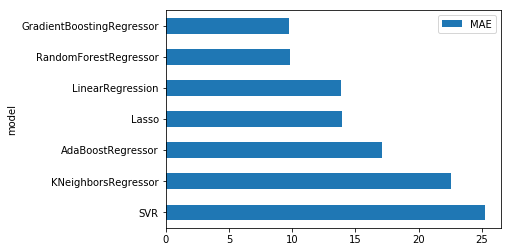

In [79]:
MAE_models = pd.DataFrame({'model': ['LinearRegression','SVR', 'RandomForestRegressor', 'GradientBoostingRegressor', 'KNeighborsRegressor', 'Lasso', 'AdaBoostRegressor'],
                          'MAE': [lr_mae, svm_mae, random_forest_mae, gradient_boosted_mae, knn_mae, ls_mae, adbr_mae]})
MAE_models.sort_values('MAE', ascending = False).plot(x = 'model', y = 'MAE',
                                                     kind = 'barh')

From the above model results, we can come to following conclusions:

- As Lasso results are higher then linear regression we can eliminate ridge, elastic net models.
- SVM and KNN are doing worse than baseline. so it will be best not to choose these models.
- By far we can see random forest and gradient boosting are the models with lowest MAE. So we will start tunning these models.

## Model Optimization

In [14]:
# Loss function to be optimized
loss = ['ls', 'lad', 'huber']

# Number of trees used in the boosting process
n_estimators = [100, 500, 900, 1100, 1500]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [15]:
# Create the model to use for hyperparameter tuning
model = GradientBoostingRegressor(random_state = 42)

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)  

In [17]:

# Fit on the training data
random_cv.fit(X_train, y_train)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 16.5min finished


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...te=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=25, n_jobs=-1,
          param_distributions={'loss': ['ls', 'lad', 'huber'], 'n_estimators': [100, 500, 900, 1100, 1500], 'max_depth': [2, 3, 5, 10, 15], 'min_samples_leaf': [1, 2, 4, 6, 8], 'min_samples_split': [2, 4, 6, 10], 'max_features': ['auto', 'sqrt', 'log2', None]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='neg_mean_absolute_error',
          verbose=1)

In [18]:
random_cv.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='lad', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=6,
             min_samples_split=6, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [47]:
random_cv.score(X_train, y_train)

-7.104742855126977

In [46]:
random_cv.score(X_test, y_test)

-9.024408374991435

In [19]:
# Create a range of trees to evaluate
trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]}

model = GradientBoostingRegressor(loss = 'lad', max_depth = 5,
                                  min_samples_leaf = 6,
                                  min_samples_split = 6,
                                  max_features = None,
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [21]:
# Fit the grid search
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  8.3min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='lad', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=6,
             min_samp...te=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

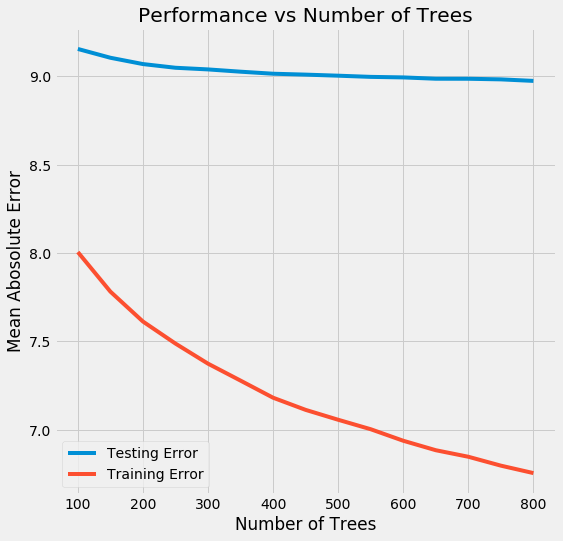

In [32]:
# Get the results into a dataframe
results = pd.DataFrame(grid_search.cv_results_)

# Plot the training and testing error vs number of trees
plt.style.use('fivethirtyeight')
figsize(8, 8)
plt.plot(results['param_n_estimators'], -1 * results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Trees'); plt.ylabel('Mean Abosolute Error'); plt.legend();
plt.title('Performance vs Number of Trees');

In [51]:
# 300
max_depth_grid = {'max_depth': [3,4,5,6,7,8]}

model = GradientBoostingRegressor(loss = 'lad',
                                  n_estimators = 300,
                                  min_samples_leaf = 6,
                                  min_samples_split = 6,
                                  max_features = None,
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
grid_search_md = GridSearchCV(estimator = model, param_grid=max_depth_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [52]:
# Fit the grid search
grid_search_md.fit(X_train, y_train)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.8min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='lad', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=6,
             min_samp...te=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [3, 4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

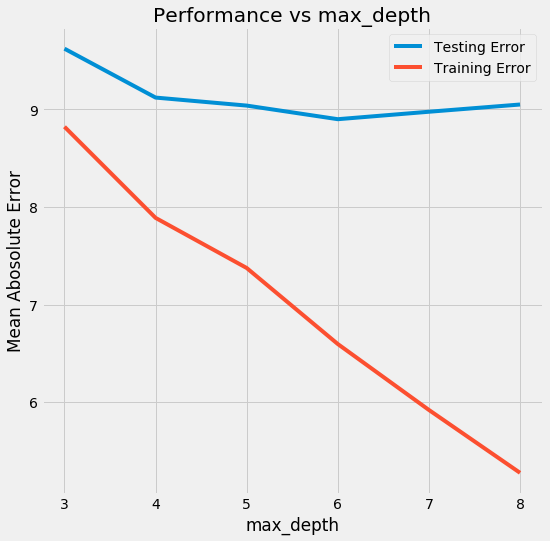

In [53]:
# Get the results into a dataframe
results = pd.DataFrame(grid_search_md.cv_results_)

# Plot the training and testing error vs number of trees
plt.style.use('fivethirtyeight')
figsize(8, 8)
plt.plot(results['param_max_depth'], -1 * results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_max_depth'], -1 * results['mean_train_score'], label = 'Training Error')
plt.xlabel('max_depth'); plt.ylabel('Mean Abosolute Error'); plt.legend();
plt.title('Performance vs max_depth');

In [40]:
# n_estimators = 300, max_depth = 4

min_samples_leaf_grid = {'min_samples_leaf': [3,4,5,6,7,8]}

model = GradientBoostingRegressor(loss = 'lad',
                                  n_estimators = 300,
                                  max_depth = 4,
                                  min_samples_split = 6,
                                  max_features = None,
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
grid_search_msl = GridSearchCV(estimator = model, param_grid=min_samples_leaf_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [41]:
# Fit the grid search
grid_search_msl.fit(X_train, y_train)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.6min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='lad', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samp...te=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_leaf': [3, 4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

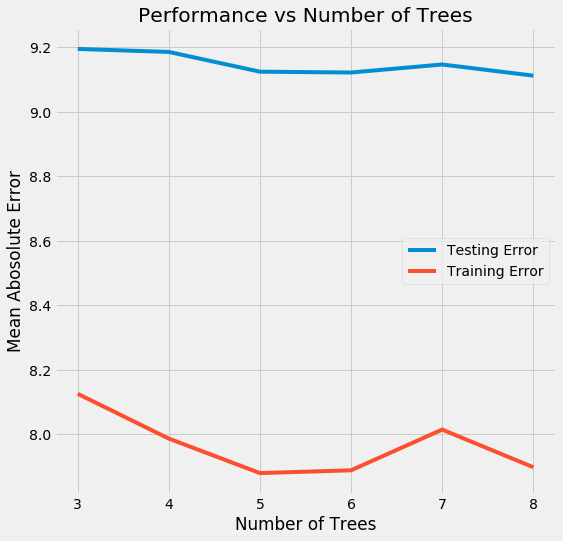

In [43]:
# Get the results into a dataframe
results = pd.DataFrame(grid_search_msl.cv_results_)

# Plot the training and testing error vs number of trees
plt.style.use('fivethirtyeight')
figsize(8, 8)
plt.plot(results['param_min_samples_leaf'], -1 * results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_min_samples_leaf'], -1 * results['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Trees'); plt.ylabel('Mean Abosolute Error'); plt.legend();
plt.title('Performance vs Number of Trees');

In [44]:
# n_estimators = 300, max_depth = 4, min_samples_leaf = 5, 

min_samples_split_grid = {'min_samples_split': [3,4,5,6,7,8]}

model = GradientBoostingRegressor(loss = 'lad',
                                  n_estimators = 300,
                                  max_depth = 4,
                                  min_samples_leaf = 5,
                                  max_features = None,
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
grid_search_mss = GridSearchCV(estimator = model, param_grid=min_samples_split_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [45]:
# Fit the grid search
grid_search_mss.fit(X_train, y_train)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.7min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='lad', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=5,
             min_samp...te=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_split': [3, 4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

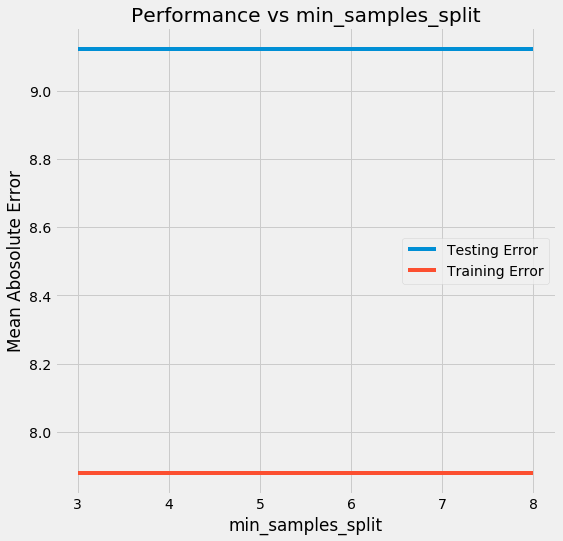

In [50]:
# Get the results into a dataframe
results = pd.DataFrame(grid_search_mss.cv_results_)

# Plot the training and testing error vs number of trees
plt.style.use('fivethirtyeight')
figsize(8, 8)
plt.plot(results['param_min_samples_split'], -1 * results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_min_samples_split'], -1 * results['mean_train_score'], label = 'Training Error')
plt.xlabel('min_samples_split'); plt.ylabel('Mean Abosolute Error'); plt.legend();
plt.title('Performance vs min_samples_split');

In [55]:
results['param_min_samples_split'], -1 * results['mean_test_score']

KeyError: 'param_min_samples_split'